## 1. General Trees

### 1.1 Tree Definitions and Properties

A tree is an abstract data type stores elements **hierarchically**. It is defined as a set of nodes storing elements such that the nodes have a parent-child relationship
    - If T is nonempty, it has a special node, the root of T that has no parent
    - Except the root element, each element in a tree has a parent element and zero or more children elements.
    - A tree can be empty. A tree is either empty or consists of a node r(the root of T) and a set of subtrees whose roots are the children of r

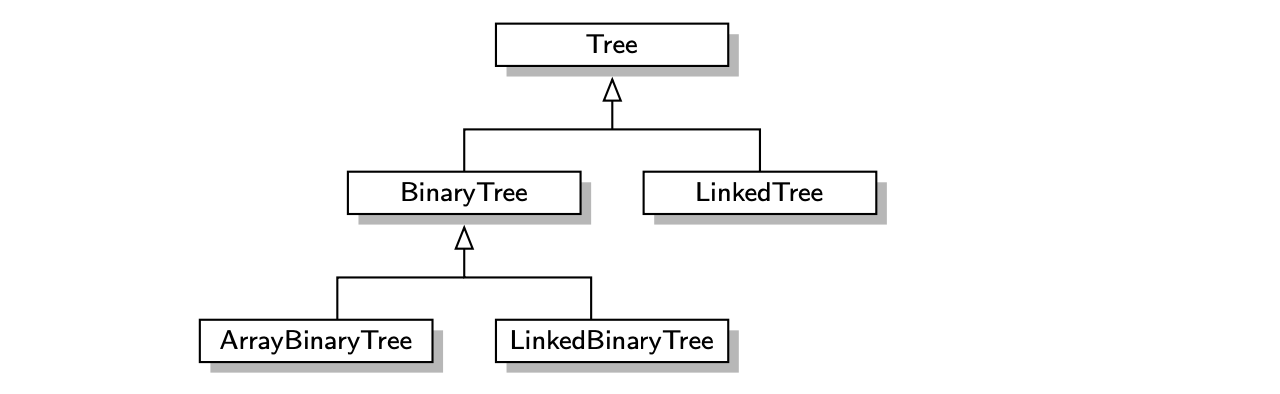
    
#### Node Relationship

1. Two nodes that are children of the same parent are siblings
2. A node v is external if v has no children.(Also known as leaves)
3. A node v is internal if it has one or more children

#### Edges and Paths in Trees

An edge of tree T is a pair of nodes(u, v) such that u is the parent of v, or vice versa.

A path of T is a sequence of nodes such that any two consecutive nodes in the sequence form an edge.
    - ArrayBinaryTree/BinaryTree/Tree

#### Ordered Trees

A tree is ordered if there is a meaningful linear order among the children of each node.

### 1.2 The Tree Abstract Data Type

Define a tree ADT using the concept of a **position** as an abstraction for a node of a tree.

An element is stored at each position, and positions satisfy parent-child relationships that define the tree structure.
<br>
A position object for a tree supports the method:
1. p.element()
    - Return the element stored at position p
    
The tree ADT supports the following accessor methods:
1. T.root()
    - Return the position of the root of tree T
    - Or None if T is empty
2. T.is_root(p)
    - Return True if position p is the root of T
3. T.parent(p)
    - Return the position of the parent of position p
    - Or None if p is the root of T
4. T.num_children(p)
    - Return the number of children of position p
5. T.children(p)
    - Generate an iteration of the children of position p
6. T.is_leaf(p)
    - Return True if position p does not have any children
7. len(T)
    - Return the number of positions that contained in T
8. T.is_empty()
    - Return True if T does not contain any positions
9. T.positions()
    - Generate an iteration of all positions of T
10. iter(T)
    - Generate an iteration of all elements stored within T
    

### A Tree Abstract Base Class in Python


In [1]:
class Tree:
    '''
    Abstract base class representing a tree structure
    '''
    #------------------Nested Position class---------------------------
    class Position:
        '''
        Abstract class representing the location of a single element
        '''
        def element(self):
            raise NotImplementedError('must be implemented by subclass')
            
        def __eq__(self, other):
            raise NotImplementedError('must be implemented by subclass')
            
        def __ne__(self, other):
            return not(self == other)
        
    #------Abstract methods that concrete subclass must support---------
    def root(self):
        raise NotImplementedError('must be implemented by subclass')
        
    def parent(self, p):
        raise NotImplementedError('must be implemented by subclass')
        
    def num_children(self, p):
        raise NotImplementedError('must be implemented by subclass')
        
    def children(self, p):
        raise NotImplementedError('must be implemented by subclass')
        
    def __len__(self):
        raise NotImplementedError('must be implemented by subclass')
    
    #----------------Concrete method implemented in this class---------
    def is_root(self, p):
        return self.root() == p
    
    def is_leaf(self, p):
        return self.num_children == 0
    
    def is_empty(self):
        return len(self) == 0

### 1.3 Computing Depth and Height

#### Depth

The depth of p(position of a node of a tree T) is the number of ancestors of p, excluding p itself.
    - The node storing International has depth 2
    - The depth of the root is 0
    
Recursively, the depth of p can be defined as:
    - If p is the root, then the depth of p is 0
    - Otherwise, the depth of p is one plus the depth of the parent of p
    
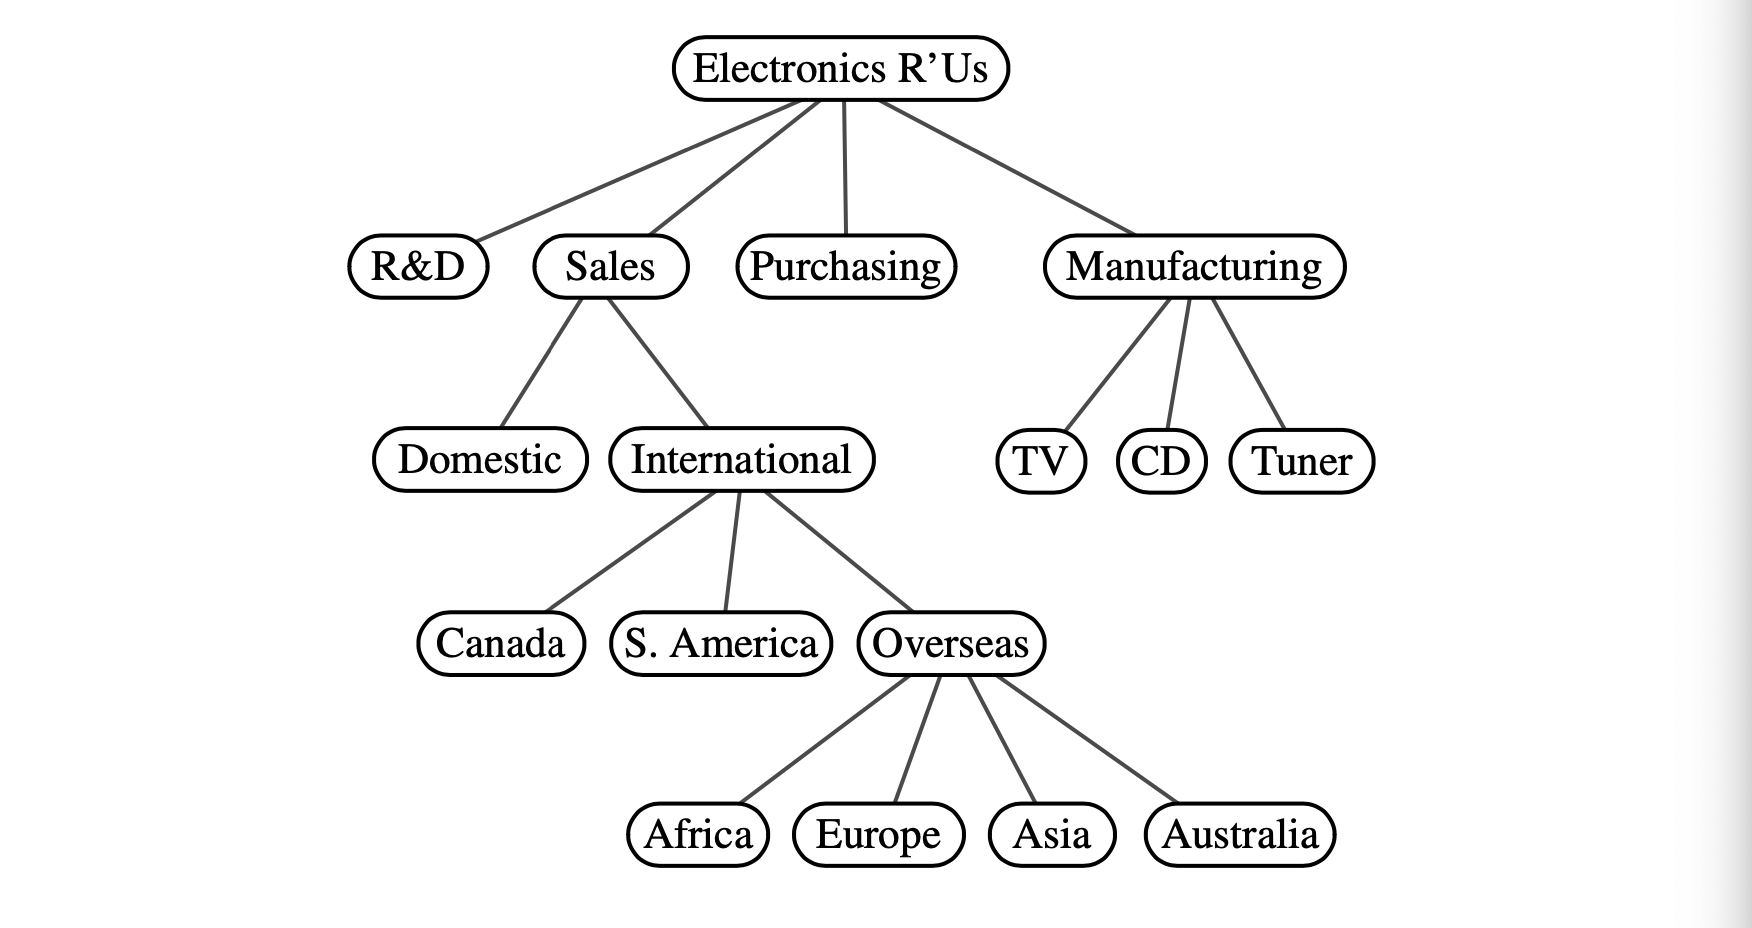

In [2]:
def depth(self, p):
    if self.is_root(p):
        return 0
    else:
        return 1 + self.depth(self.parent(p))

The running time of T.depth(p) for position p is O($d_p + 1$), where $d_p$ denotes the depth of p in the tree T.
<br>
In worst case, the algorithm run in O(n), for n is the total number of positions of T
    - If all nodes form a single branch, depth n-1

#### Height

The height of a position p in a tree T can be defined recursively:
    - If p is a leaf, then the height of p is 0
    - Otherwise, the height of p is one more than the maximum of the heights of p's children
    
1. The tree has height 4
2. The node Sales has height 3

In [3]:
def _height(self, p):
    if self.is_leaf(p):
        return 0
    else:
        return 1 + max(self._height(c) for c in self.children(p))
    
# public height method
def height(self, p = None):
    # if p is None, return the height of the entire tree
    if p is None:
        p = self.root()
    return self._height(p)

## 2. Binary Tree

A binary tree is an **ordered** tree with the folling properties:
1. Every node has at most two children
2. Each child node is labeled as being either a left child or a right child
3. A left child precedes a right child in the order of children of a node.

Other properties:
1. The subtree rooted at a left or right child of an internal node v is called a left subtree or right subtree.
2. Proper/full binary tree:
    - Each node has either zero or two children
    - Every internal node has exactly two children.
    
#### Arithmetic expression tree.
    
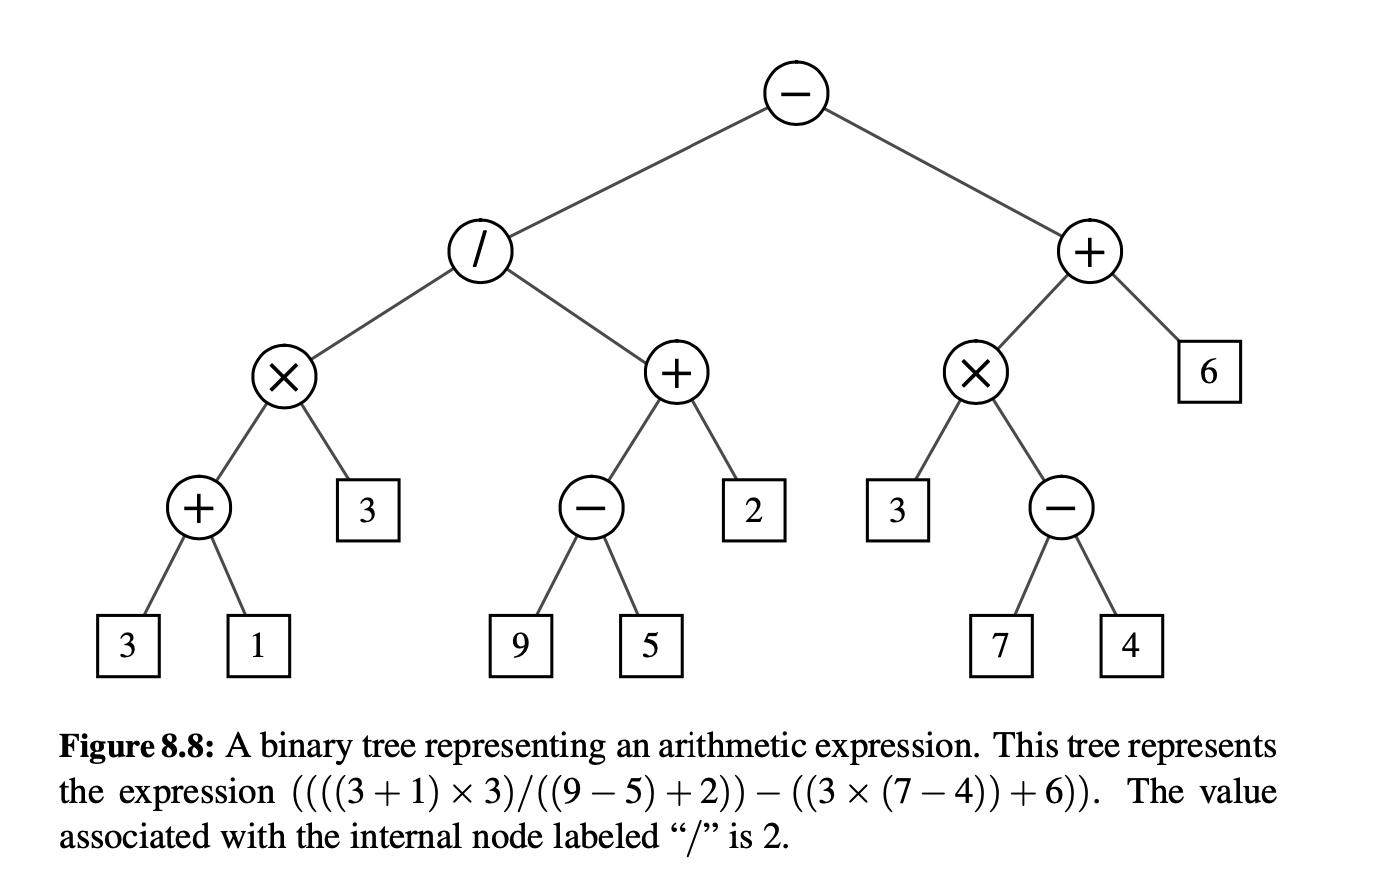

- If a node is leaf, then its value is that of its variable or constant.
- If a node is internal, then its value is defined by applying its operation to the values of its children.

#### A Recursive Binary Tree Definition

A binary tree is either empty or consists of:
    - A node r, called the root of T, that stores an element
    - A binary tree(possibly empty), called the left subtree of T
    - A binary tree(possibly empty), called the right subree of T

### 2.1 The Binary Tree Abstract Data Type

As an abstract data type, a binary tree is a specialization of a tree that supports three additional accessor methods:

1. T.left(p)
    - Return the position that represents the left child of p
    - Or None if p has no left child
2. T.right(p)
    - Return the position that represents the right child of p
    - Or None if p has no right child
3. T.sibling(p)
    - Return the position that represents the sibling of p
    - Or None if p has no sibling

In [4]:
class BinaryTree(Tree):
    '''
    Abstract base class representing a binary tree structure
    '''
    
    #-----------------------additional abstract methods----------------
    
    def left(self, p):
        raise NotImplementedError('must be implemented by subclass')
        
    def right(self, p):
        raise NotImplementedError('must be implemented by subclass')
        
    #--------------------concrete methods implemented in this class----
    
    def sibling(self, p):
        parent = self.parent(p)
        if parent is None: # p must be root
            return None
        else:
            if p == self.left(parent):
                return self.right(parent)
            else:
                return self.left(parent)
    
    def children(self, p):
        '''
        Generate an iteration of Positions representing p's children
        '''
        if self.left(p) is not None:
            yield self.left(p)
        if self.right(p) is not None:
            yield self.right(p)

### 2.2 Properties of Binary Trees

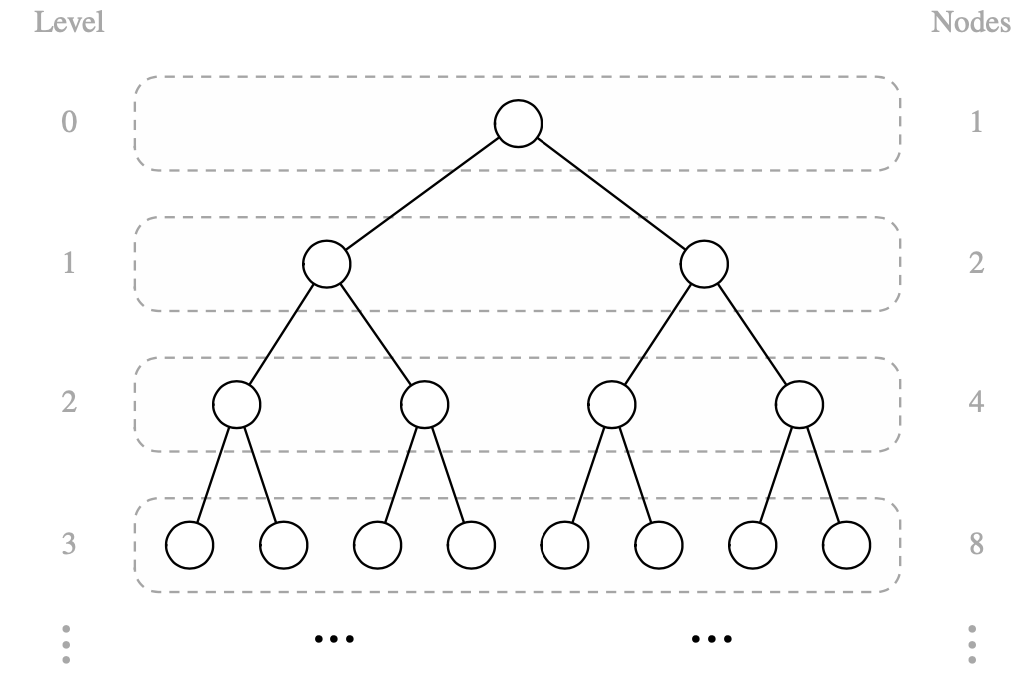

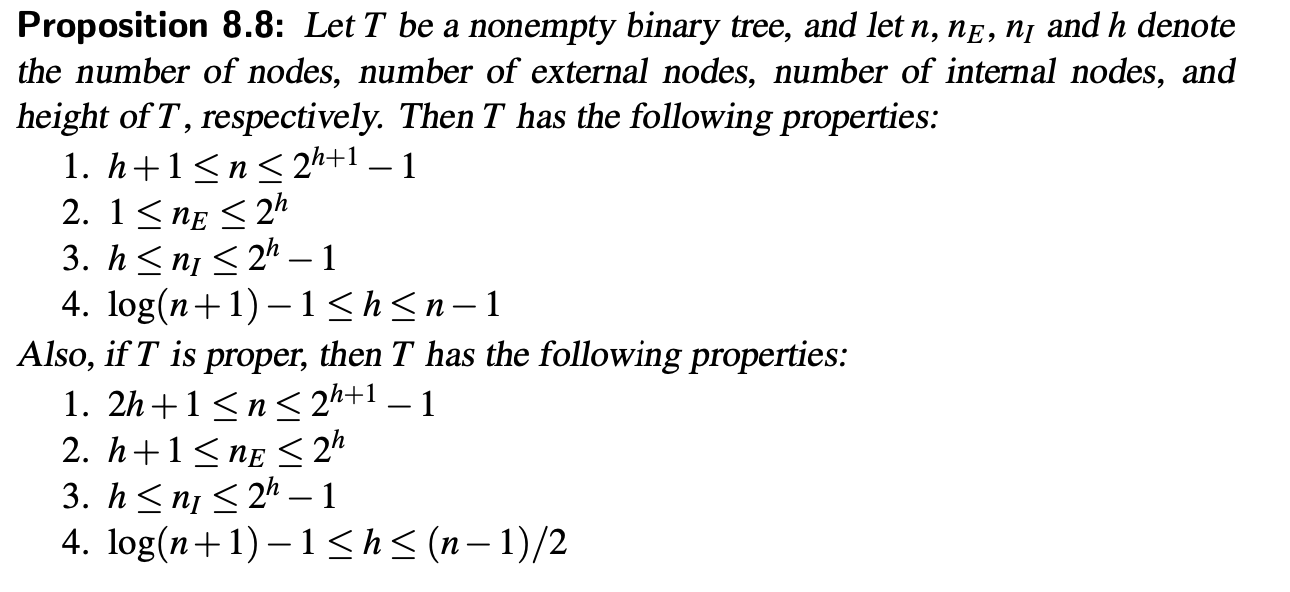

#### Relating Internal Nodes to External Nodes in a Proper Binary Tree

In a nonempty proper binary tree T, with $n_E$ external nodes and $n_I$ internal nodes
<br>
we have $n_E = n_I + 1$

## 3. Implementing Trees

### 3.1 Linked Structure for Binary Trees

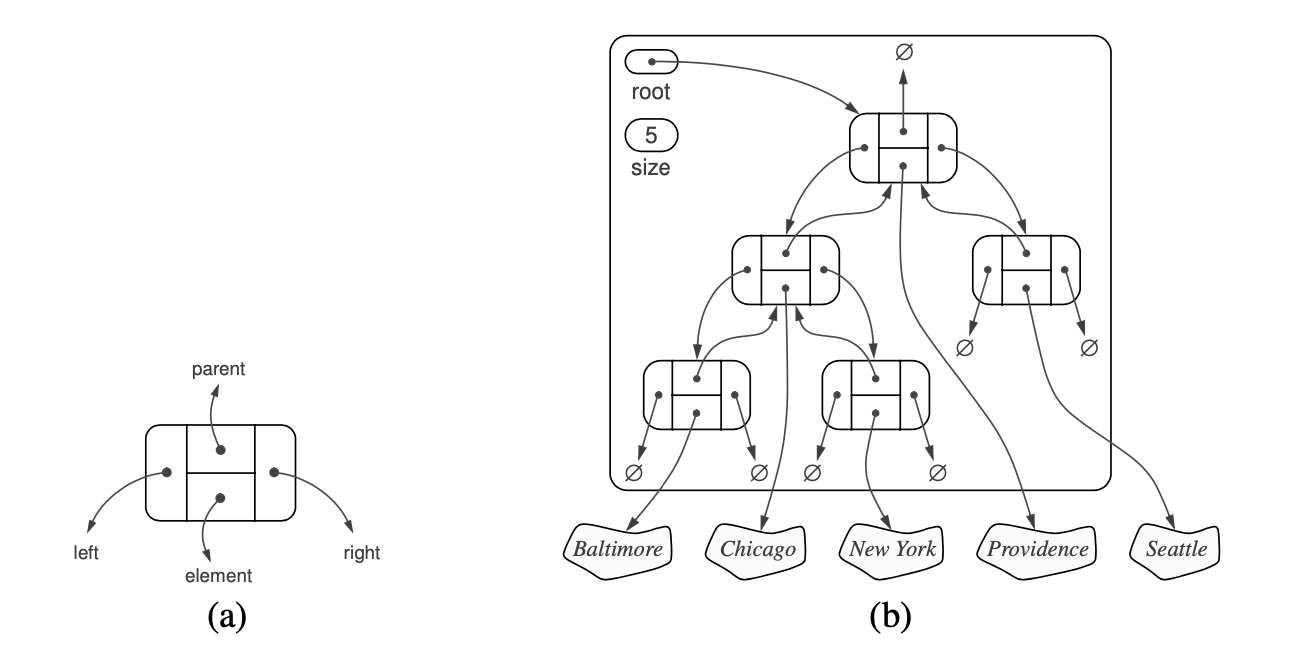


In [5]:
class LinkedBinaryTree(BinaryTree):
    '''
    Linked representation of a binary tree structure
    '''
    class _Node:
        '''
        Lightweight, nonpublic class for storing a node
        '''
        __slots__ = '_element','_parent','_left','_right'
        def __init__(self, element, parent = None, left = None, right = None):
            self._element = element
            self._parent = parent
            self._left = left
            self._right = right
        
    class Position(BinaryTree.Position):
        '''
        Abstraction representing the location of a single element
        Wraps a node
        '''
        def __init__(self, container, node):
            # constructor should not be invoked by user
            self._container = container
            self._node = node
            
        def element(self):
            return self._node._element
        
        def __eq__(self, other):
            return type(other) is type(self) and other._node is self._node
        
    def _validate(self, p):
        # robustly checking the validity of a given position instance 
        # when unwrapping it.
        if not isinstance(p, self.Position):
            raise TypeError('p must be proper Position type')
        if p._container is not self:
            raise ValueError('p does not belong to this container')
        # For deprecated node
        if p._node._parent is p._node:
            raise ValueError('p is no longer valid')
        return p._node
    
    def _make_position(self, node):
        # wrapping a node as a position to return to a caller
        return self.Position(self, node) if node is not None else None
    
    #-----------------------binary tree constructor--------------------
    
    def __init__(self):
        self._root = None
        self._size = 0
        
    #-----------------------public accessors----------------------------
    
    def __len__(self):
        return self._size
    
    def root(self):
        return self._make_position(self._root)
    
    def parent(self, p):
        node = self._validate(p)
        return self._make_position(node._parent)
    
    def left(self, p):
        node = self._validate(p)
        return self._make_position(node._left)
    
    def right(self, p):
        node = self._validate(p)
        return self._make_position(node._right)
    
    def num_children(self, p):
        node = self._validate(p)
        count = 0
        if node._left is not None:
            count += 1
        if node._right is not None:
            count += 1
        return count
    
    #-----------------------Nonpublic update-----------------------------
    def _add_root(self, e):
        '''
        Place element e at the root of an empty tree and return new Position
        Raise ValueError if tree nonempty
        '''
        if self._root is not None:
            raise ValueError('Root exists')
        self._size = 1
        self._root = self._Node(e)
        return self._make_position(self._root)
    
    def _add_left(self, p, e):
        node = self._validate(p)
        if node._left is not None:
            raise ValueError('Left child exists')
        self._size += 1
        node._left = self._Node(e, node)
        return self._make_position(node._left)
    
    def _add_right(self, p, e):
        node = self._validate(p)
        if node._right is not None:
            raise ValueError('Right child exists')
        self._size += 1
        node._right = self._Node(e, node)
        return self._make_position(node._right)
    
    def _replace(self, p, e):
        '''
        Replace the element at position p with e, and return old element
        '''
        node = self._validate(p)
        old = node._element
        node._element = e
        return old
    
    def _delete(self, p):
        '''
        Delete the node at Position p, and replace it with its child, if any
        Return the element that had been stored at Position p
        Raise ValueError if Position p is invalid or has two children
        '''
        node = self._validate(p)
        if self.num_children(p) == 2:
            raise ValueError('p has two children')
        # Might be None    
        child = node._left if node._left else node._right 
        if child is not None:
            child._parent = node._parent
        if node is self._root:
            self._root = child
        else:
            parent = node._parent
            if node is parent._left:
                parent._left = child
            else:
                parent._right = child
        self._size -= 1
        # Convention for deprecated node
        node._parent = node
        return node._element
    
    def _attach(self, p, t1, t2):
        '''
        Attach tree t1 and t2 as left and right subtrees of external p
        '''
        node = self._validate(p)
        if not self.is_leaf(p):
            raise ValueError('position must be leaf')
        if not type(self) is type(t1) is type(t2):
            raise TypeError('Tree types must match')
        self._size += len(t1) + len(t2)
        if not t1.is_empty():
            t1._root._parent = node
            node._left = t1._root
            # set t1 instance to empty
            t1._root = None
            t1._size = 0
        if not t2.is_empty():
            t2._root._parent = node
            node._right = t2._root
            t2._root = None
            t2._size = 0

#### Performance of the Linked Binary Tree Implementation

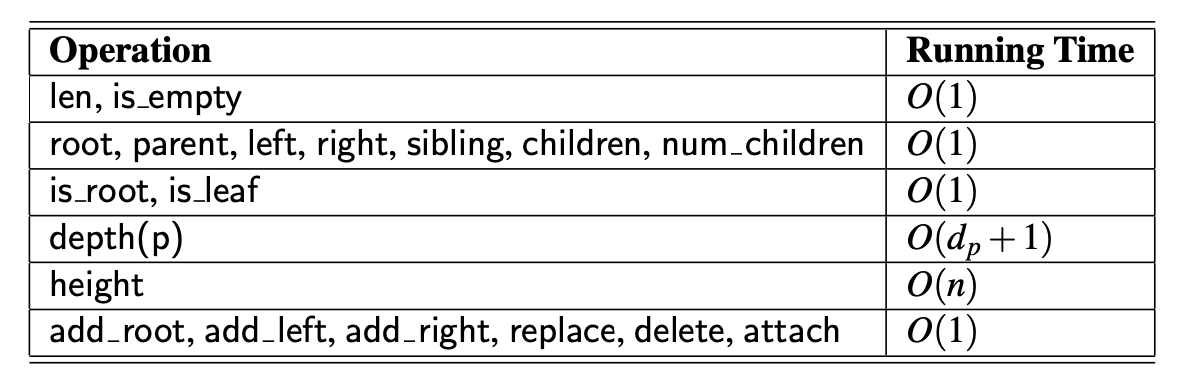

### 3.2 Array-Based Representation of a Binary Tree

For every position p of T, let f(p) be the interger defined as follows:
1. If p is the root of T
    - f(p) = 0
2. If p is the left child of position q
    - f(p) = 2f(q) + 1
3. If p is the right child of position q
    - f(p) = 2f(q) + 2
    
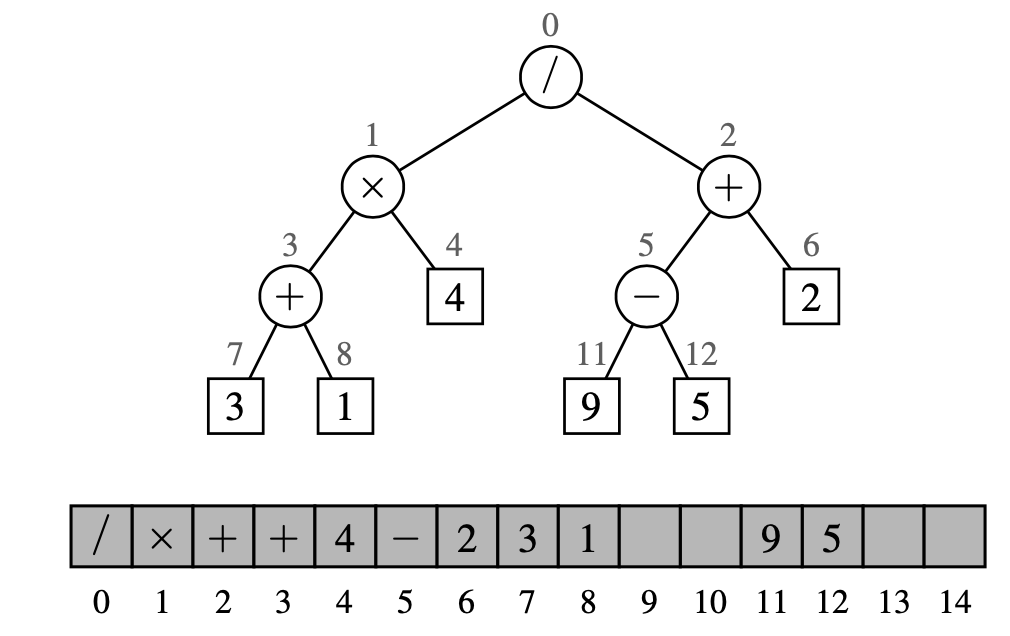

#### Advantages:

1. A position p can be represented by the single integer
    - position-based methods such as root, parent, left, right can be implemented using simple arighmetic operations
2. Space efficient
    - Except the worst case: $2^n - 1$
    
#### Disadvantages:

1. Some update operations cannot be efficiently supported.
    - Deleting a node and promoting its child take O(n), need to move all descendants of that child

### 3.3 Linked Structure for General Trees

To have each node store a single container of references to its children.

A children field of a node can be a Python list of references to the children of the node.

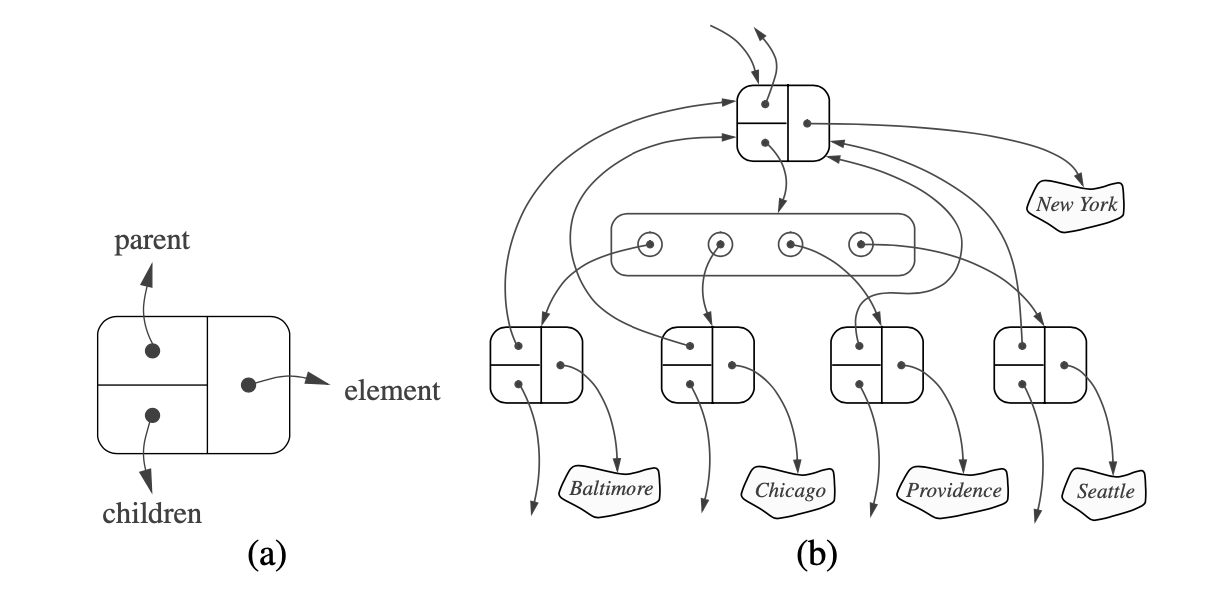

## 4. Tree Traversal Algorithms

A traversal of a tree T is to visit all the positions of T one time each.

### 4.1 Preorder and Postorder Traversals of General Trees

#### Preorder 前序遍历

Root -> Left Subtree -> Right Subtree

Traverse the subtree rooted at postion p:

    Algorithm preorder(T,p):
    - visit(p)
    - for each child c in T.children(p) do:
            - preorder(T, c)

#### Postorder Traversal 后序遍历

Left Subtree -> Right Subtree -> Root

Traverse the subtree rooted at p:

    Algorithm postorder(T,p):
    - for each child c in T.children(p) do:
        - Postorder(T, c)
    - visit(p)
    
#### Inorder Traversal of a Binary Tree 中序遍历

Left Subtree -> Root -> Right Subtree

    Algorithm inorder(p):
    - if p has a left child lc then:
        - inorder(lc)
    - visit(p)
    - if p has a right child rc then:
        - inorder(rc)

Application: **Binary Search Trees**

A binary search tree has the following properties:
<br>
For each position p of T:
1. Position p stores an element, denoted as e(p)
2. Elements stored in the left subtree of p(if any) are less than e(p)
3. Elements stored in the right subtree of p(if any) are greater then e(p)

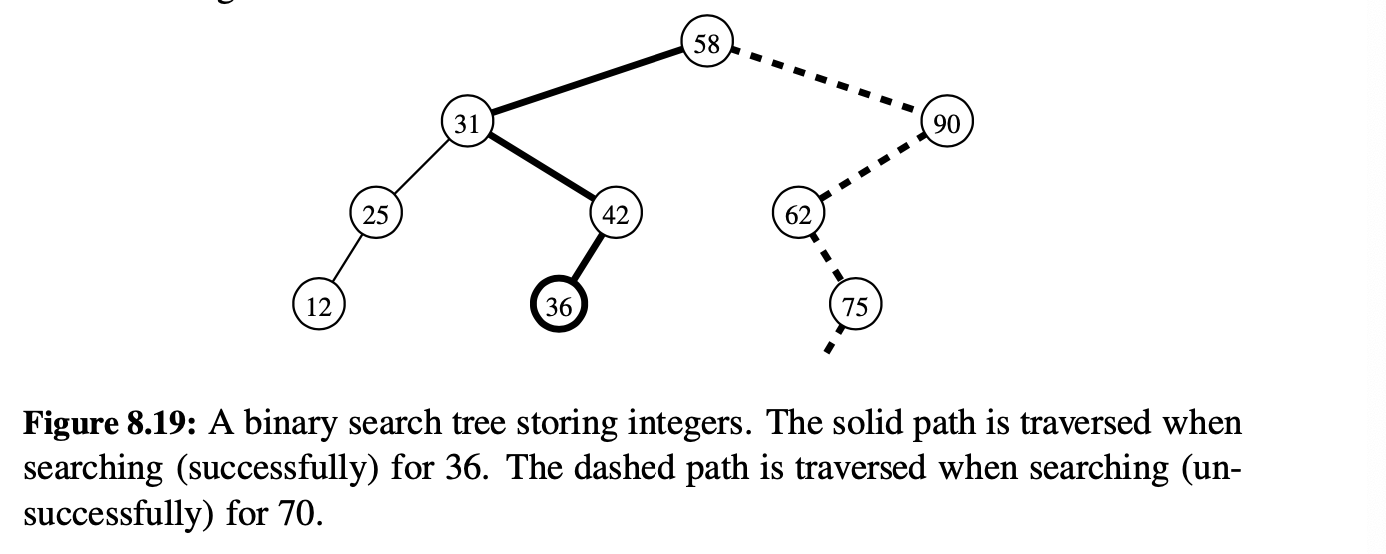

The running time of searching in a binary search tree is proportional to the height H.<br>
The height of a binary tree with n nodes can be range from:
    - log(n+1) - 1 to n - 1

#### 注意：Preorder, inorder, postorder 都属于Depth-First Traversal 深度优先遍历

从根节点出发，沿着子树方向进行纵向遍历，直到找到叶子节点为止。然后回溯到前一个节点，进行另一个子树节点的遍历，直到遍历完所有可达节点为止。

#### Breadth-First Traversal 广度优先遍历/层序遍历

According to Level

<font color = 'red'>Queue</font>

Algorithm is not recursive, since we are not traversing entire subtree at once.<br>
Overall running time is O(n)

    Algorithm breadthfirst(T):
    - Initialize queue Q to contain T.root()
    - while Q not empty do:
        - p = Q.dequeue()
        - visit(p)
        - for each child c in T.children(p) do:
            - Q.enqueue(c)

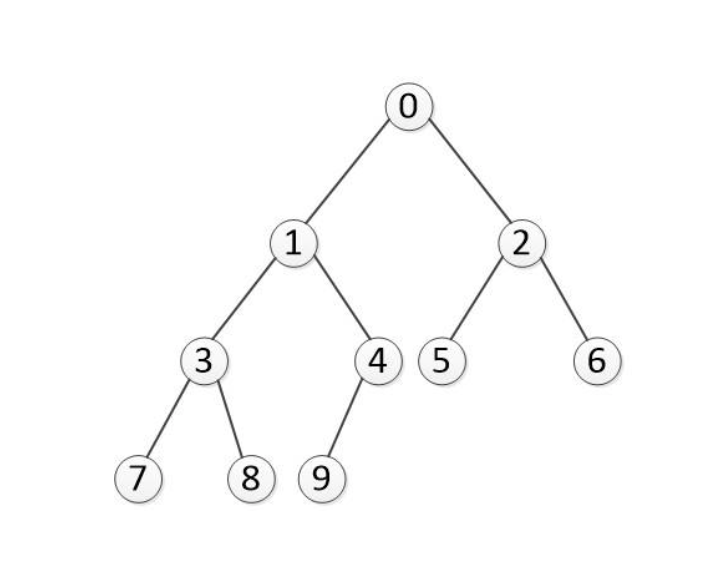

Preorder Traversal:
    - 0137849256
Postorder Traversal:
    - 783941562
Inorder Traversal:
    - 7381940526
Breadth-First Traversal:
    - 0123456789

### 4.4 Implementing Tree Traversals in Python

In [6]:
def __iter__(self):
    for p in self.positions():
        yield p.element()

#### Preorder Traversal

The recursive algorithm for generating a preorder traversal, must be parameterized by a specific position within the tree, that serves as the root of a subtree to traverse.
<br><br>
Thus define a nonpublic method _subtree_preorder with the desired recursive parameterization.

In [7]:
def preorder(self):
    'Generate a preorder iteration of positions in the tree'
    if not self.is_empty():
        for p in self._subtree_preorder(self.root()):
            yield p

def _subtree_preorder(self, p):
    'Generate a preorder iteration of positions in subtree rooted at p'
    # visit p before its subtrees
    yield p
    for c in self.children(p):
        for other in self._subtree_preorder(c):
            # re-yield position in the outer context
            yield other

In [8]:
# To use a preorder traversal as the default order of iteration
def positions(self):
    return self.preorder()

#### Postorder Traversal

In [9]:
def postorder(self):
    if not self.is_empty():
        for p in self._subtree_postorder(self.root()):
            yield p

def _subtree_postorder(self, p):
    for c in self.children(p):
        for other in self._subtree_postorder(c):
            yield other
    yield p

#### Breadth-First Traversal

In [10]:
def breadthfirst(self):
    if not self.is_empty():
        fringe = LinkedQueue()
        fringe.enqueue(self.root())
        while not fringe.is_empty():
            p = fringe.dequeue()
            yield p
            for c in self.children(p):
                fringe.enqueue(c)

#### Inorder Traversal

In [11]:
def inorder(self):
    if not self.is_empty():
        for p in self._subtree_inorder(self.root()):
            yield p
            
def _subtree_inorder(self, p):
    if self.left(p) is not None:
        for other in self._subtree_inorder(self.left(p)):
            yield other
    yield p
    if self.right(p) is not None:
        for other in self._subtree_inorder(self.right(p)):
            yield other

### 4.5 Applications of Tree Traversals

#### Table of Contents

To add indention based on element's depth within the tree.
<br>
The root element is unindented

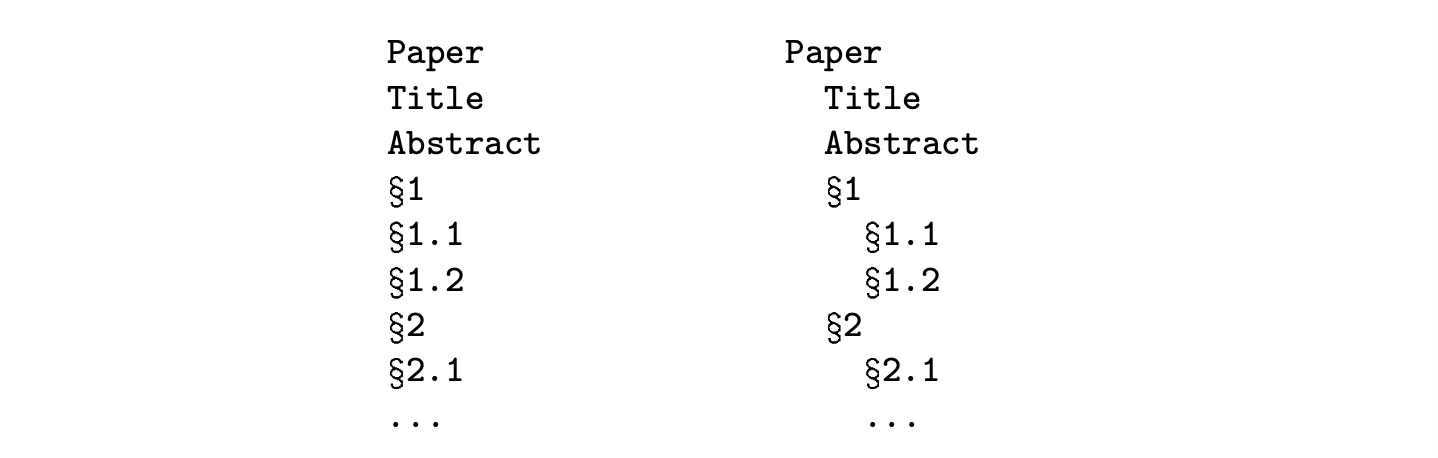

Redesign a top-down recursion that includes the current depth as an additional parameter.<br>
Worst-case O(n)

In [12]:
def preorder_indent(T, p, d):
    '''
    Print preorder representation of subtree of T rooted at p at depth d
    '''
    print(2*d*' ' + str(p.element()))
    for c in T.children(p):
        preorder_indent(T, c, d+1)

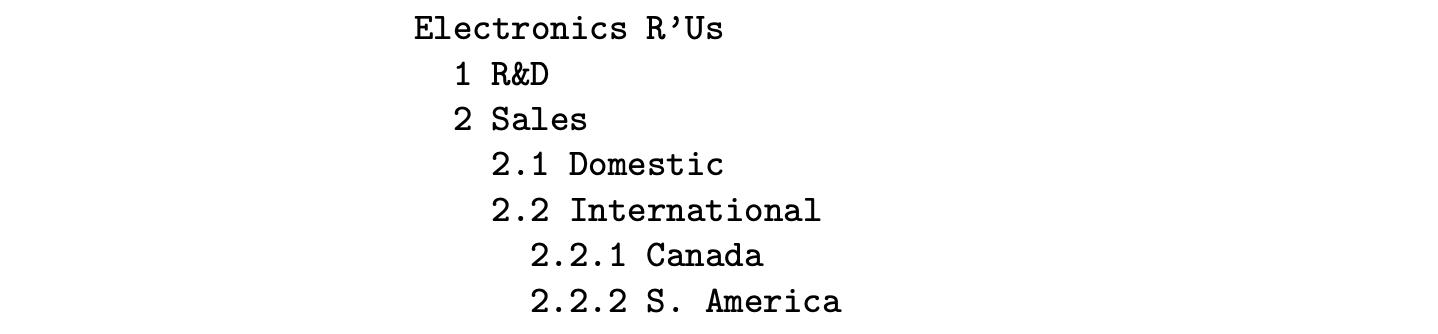

To add indention and explicit number as labels.

In [13]:
def preorder_label(T, p, d, path):
    '''
    Print labeled representation of subtree of T rooted at p at depth d
    '''
    # j+1 converting from 0-index to 1-index
    label = '.'.join(str(j+1) for j in path)
    print(2*d*' ' + label, p.element())
    path.append(0)
    for c in T.children(p):
        preorder_label(T, c, d+1, path)
        path[-1] += 1
    # Make the path list reusable
    path.pop()

#### Parenthetic Representations of a Tree

Given only the preorder sequence of elements, we can not reconstruct a general tree. 
<br>
The use of indentation or numbered labels provide additional context to reconstruct, in a human-friendly presentation.
<br>
Computer-friently method:
    - Parenthetic string representation
    
    If tree T consist of a single position p:
        - P(T) = str(p.element())
    Otherwise, it is defined recursively as:
        - P(T) = str(p.element()) + '(' + P(T_1) + ',' + ....+ ',' + P(T_k) + ')'
        - T_1, T_2, ...T_k are the subtree rooted at p

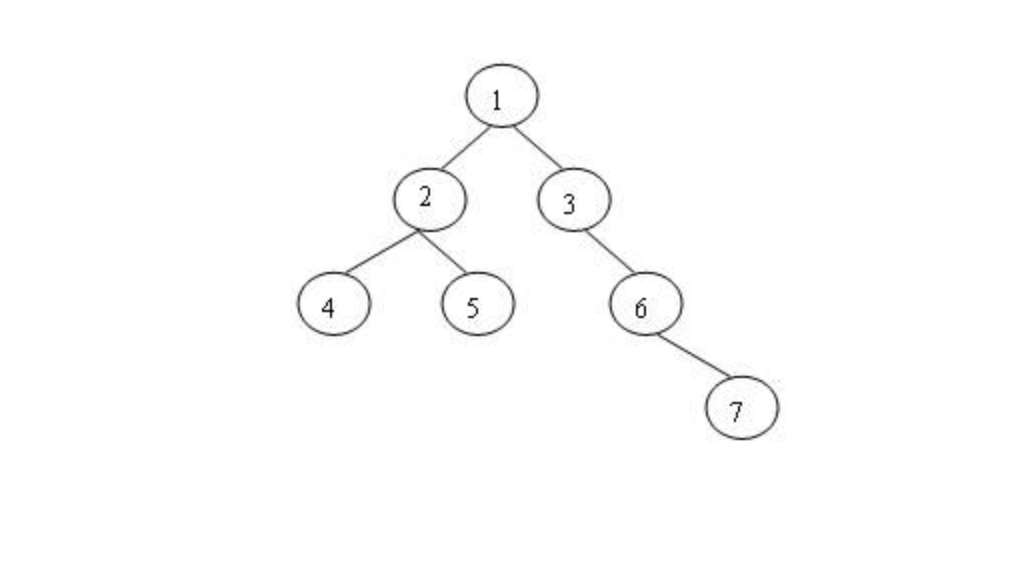

The parenthetic string representation is:
    - 1(2(4,5),3(6(7)))

In [14]:
def parenthesize(T, p):
    '''
    Print parenthesized representation of subtree of T rooted at p
    '''
    # Use of end to avoids trailing new line
    print(p.element(), end = '')
    if not T.is_leaf(p):
        first_time = True
        for c in T.children(p):
            sep = ' (' if first_time else ', '
            print(sep, end = '')
            first_time = False
            parenthesize(T, c)
        print(')', end = '')

#### Computing Disk Space

Using a postorder traversal.
    - Can not compute the total space until after compute the space used by all its children

In [15]:
def disk_space(T, p):
    '''
    Return total disk space for subtree of T rooted at p
    '''
    subtotal = p.element().space()
    for c in T.children(p):
        subtotal += disk_space(T, c)
    return subtotal

### 4.6 Euler Tours and the Template Method Pattern

#### Euler Tours Traversal

A more general framework for implementing tree traversal.

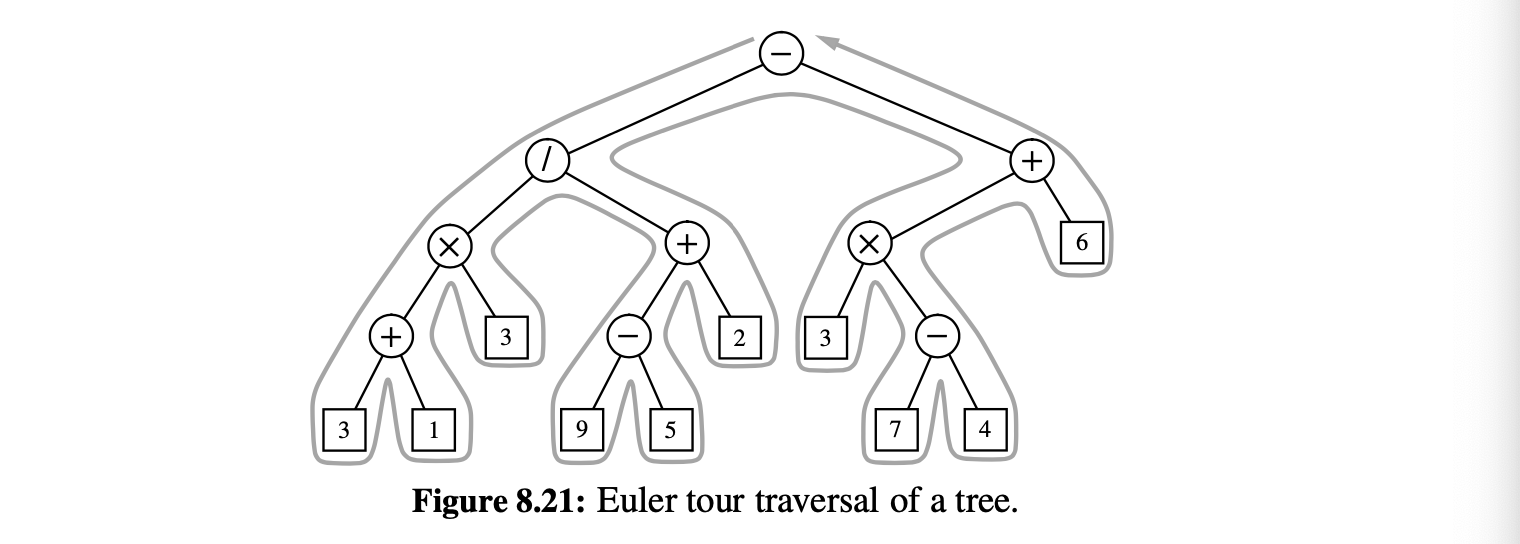

The complexity of the walk is O(n):
    - For a tree with n nodes, there are n-1 edges
    - The walk progresses exactly two times along each edge, once going down, once going upward.
    
There are two visit for each position p:
1. pre_visit:
    - When first reaching the position
    - when the walk passes immediately left of the node in visualization
2. post_visit:
    - When the walk later proceeds upward from the position
    - Right in the visualization
    

    Algorithm eulertour(T,p):
    - pre_visit(p)
    - for each child c in T.children(p) do:
        eulertour(T,c)
    - post_visit(p)

#### The Template Method Pattern

- A Object-Oriented software design pattern.
- Describes a generic computation mechanism that can be specialized for a particular application by redefining certain steps
- To allow customization, the primary algorithm calls auxiliary function(hooks) at designated steps of the process.


In the Euler tour traversal, we define two separate hooks.
1. Pre-visit hook called before the subtrees are traversed
2. Post-visit hook called after the subtrees are traversed.

The traversal can be customized by defining a subclass of EulerTour and overriding hooks to provide specialized behavior.

In [16]:
class EulerTour:
    '''
    Abstract base class for performing Euler tour of a tree
    '''
    
    def __init__(self, tree):
        self._tree = tree
        
    def tree(self):
        return self._tree
    
    def execute(self):
        '''
        Perform the tour and return any result from post visit of root
        '''
        if len(self._tree) > 0:
            return self._tour(self._tree.root(),0,[])
        
    def _tour(self, p, d, path):
        '''
        Perform tour of subtree rooted at Position p
        
        p    Position of current node being visit
        d    depth of p in the tree
        path list of indices of children on path from root to p       
        '''
        self._hook_previsit(p, d, path)
        results = []
        path.append(0)
        for c in self._tree.children(p):
            results.append(self._tour(c,d+1,path))
            path[-1] += 1
        path.pop()
        answer = self._hook_postvisit(p,d,path,results)
        return answer
    
    def _hook_previsit(self, p, d, path):
        pass
    
    def _hook_postvisit(self, p, d, path, results):
        pass

#### Using the Euler Tour Framework

Indented preorder traversal

In [17]:
class PreorderPringIndentedTour(EulerTour):
    def _hook_previsit(self, p, d, path):
        print(2*d*' ' + str(p.element()))

Labeled indention

In [18]:
class PreorderPrintIndentedLabeledTour(EulerTour):
    def _hook_previsit(self, p, d, path):
        label = '.'.join(str(j+1) for j in path)
        print( 2 * d * ' ' + label, p.element())

Parenthetic string representation

In [19]:
class ParenthesizeTour(EulerTour):
    def _hook_previsit(self, p, d, path):
        if path and path[-1] > 0: # p follows a sibling
            print(', ', end = '')
        print(p.element(),end = '')
        if not self.tree().is_leaf(p):
            print(' (', end='')
    
    def _hook_postvisit(self, p, d, path, results):
        if not self.tree().is_leaf(p):
            print(')', end = '')

Computing Disk Space

In [20]:
class DiskSpaceTour(EulerTour):
    def _hook_postvisit(self, p, d, path, result):
        return p.element().space() + sum(results)

### 4.7 The Euler Tour Traversal of a Binary Tree

In [21]:
class BinaryEulerTour(EulerTour):
    '''
    Abstract base class for performing Euler tour of a binary tree
    
    Includes an additional _hook_invisit that is called after the tour
    of the left subtree(if any), before the tour of the right 
    subtree(if any)
    
    Right child is always assigned index 1 in path, even no left sibling
    '''
    def _tour(self, p, d, path):
        results = [None, None]
        self._hook_previsit(p, d, path)
        if self._tree.left(p) is not None:
            path.append(0)
            results[0] = self._tour(self._tree.left(p), d+1, path)
            path.pop()
        self._hook_invisit(p, d, path)
        if self._tree.right(p) is not None:
            path.append(1)
            results[1] = self._tour(self._tree.right(p), d+1, path)
            path.pop()
        answer = self._hook_postvisit(p, d, path, results)
        return answer
    
    def _hook_invisit(self, p, d, path):
        pass

#### Binary Layout

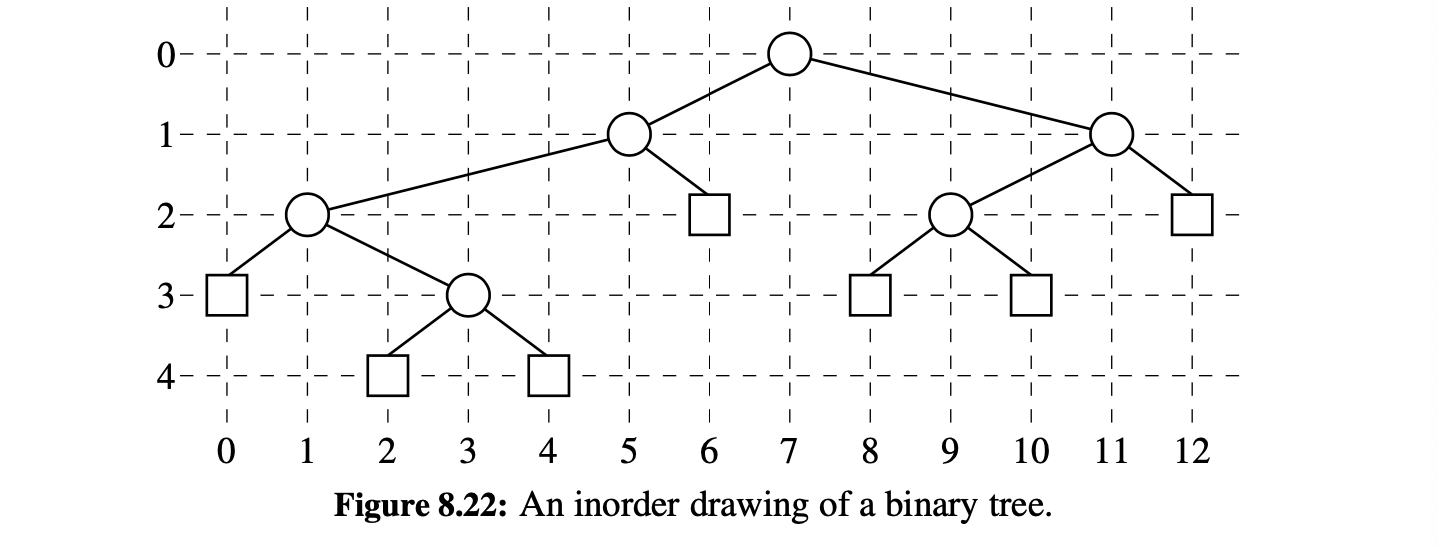

The x- and y-coordinates to each position p of a binary tree T follows:
1. x(p):
    - The number of positions visited before p in an inorder traversal of T
2. y(p):
    - The depth of p in T

In [22]:
class BinaryLayout(BinaryEulerTour):
    def __init__(self, tree):
        # must call the parent constructor
        super().__init__(tree)
        self._count = 0
    
    def _hook_invisit(self, p, d, path):
        p.element().setX(self._count)
        p.element().setY(d)
        self._count += 1

## 5. Case Study: An Expression Tree

ExpressionTree class needs to support two basic forms of initialization:

1. ExpressionTree(value): 
    - Create a tree storing the given value at the root.
2. ExpressionTree(op,E1,E2): 
    - Create a tree storing string op at the root (e.g., +)
    - with the structures of existing ExpressionTree instances E1 and E2 as the left and right subtrees of the root, respectively.

In [26]:
class ExpressionTree(LinkedBinaryTree):
    
    def __init__(self, token, left = None, right = None):
        '''Create an expression tree.

     In a single parameter form, 
     token should be a leaf value (e.g., 42 ),
     and the expression tree will have that value at an isolated node.

     In a three-parameter version, token should be an operator,
     and left and right should be existing ExpressionTree instances
     that become the operands for the binary operator.
     '''
        super().__init__()
        if not isinstance(token, str):
            raise TypeError('Token must be a string')
        if left is not None:
            if token not in '+-*/':
                raise ValueError('token must be valid operator')
            self._attach(self.root(), left, right)
        
    def __str__(self):
        'Return string representation of the expression.'
        pieces = [ ] # sequence of piecewise strings to compose
        self._parenthesize_recur(self.root( ), pieces)
        return ''.join(pieces)

    def _parenthesize_recur(self, p, result):
        'Append piecewise representation of p subtree to resulting list.'
        if self.is_leaf(p):
            result.append(str(p.element()))
        else:
            result.append('(')
            self._parenthesize_recur(self.left(p), result)
            result.append(p.element())
            self._parenthesize_recur(self.right(p), result)
            result.append(')')

    def evaluate(self):
        'Return the numeric result of the expression.'
        return self._evaluate_recur(self.root())
    
    def _evaluate_recur(self, p):
        'Return the numeric result of subtree rooted at p'
        if self.is_leaf(p):
            return float(p.element()) # we assume element is numeric 
        else:
            op = p.element()
            left_val = self._evaluate_recur(self.left(p)) 
            right_val = self._evaluate_recur(self.right(p))
            if op == '+':
                return left_val + right_val
            elif op == '-':
                return left_val - right_val
            elif op == '/':
                return left_val / right_val
            else:
                return left_val * right_val          

#### Building an Expression Tree

To construct a tree that represents an expression for a given string
    - (((3+1)x4)/((9-5)+2)) .
    
uses a stack S:
1. When we see an operator
    - we push that string on the stack.
2. When we see a literal value v, 
    - we create a single-node expression tree T storing v, and push T on the stack.
3. When we see a right parenthesis,')', 
    - we pop the top three items from the stack S, which represent a subexpression (E1 operator E2). 
    - We then construct a tree T using trees for E1 and E2 as subtrees of the root storing operator, and push the resulting tree T back on the stack.

In [27]:
def build_expression_tree(token):
    'Returns an expression tree based on a tokenized expression'
    S = []
    for t in tokens:
        if t in '+-*/':
            S.append(t)
        elif t not in '()':
            S.append(ExpressionTree(t))
        elif t == ')':
            right = S.pop()
            operator = S.pop()
            left = S.pop()
            S.append(ExpressionTree(operator, left, right))
        return S.pop()